# AADS Assignment 2

Submitted by: Vipul Krishnan M.D. 

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt
from random import randint
import math
import time

In [20]:
# Class for representing point
class Point:
    def __init__(self, x, y, id):
        self.x = x
        self.y = y
        self.id = id
    
    # Prints the Point object in "Id(x,y)" format    
    def __repr__(self):
        return str(self.id) + "(" + str(self.x) + "," + str(self.y) + ")"
    
    # Prints the Point object in "Id(x,y)" format 
    def __str__(self):
        return str(self.id) + "(" + str(self.x) + "," + str(self.y) + ")"

    def translate(self, x, y):
        self.x = x
        self.y = y

    def distance(self, point):
        return math.sqrt((self.x - point.x)**2 + (self.y - point.y)**2)

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def setX(self, x1):
        self.x = x1

    def setY(self, y1):
        self.y = y1

    def distanceOrigin(self):
        return math.sqrt((self.x - 0)**2 + (self.y - 0)**2)

    def printPoint(self):
        print('(', self.x, ',', self.y, ')')


## Question 1

In [21]:
# This function return the list of n random points.
def pointGenerator(n):
    pointList = []
    for i in range(0, n):
        x = randint(-20, 20)
        y = randint(-20, 20)
        point = Point(x, y, i)
        pointList.append(point)    
    return pointList

### Testing pointGenerator

In [22]:
points = pointGenerator(5)
print("Points [ in ID(X,Y) ] format are below: ")
print(points)

Points [ in ID(X,Y) ] format are below: 
[0(-4,-10), 1(16,-8), 2(-6,10), 3(-19,-20), 4(5,-11)]


## Question 2

In [23]:
# Partition class
class UnionFind:
    
    def __init__(self):
        self.parent = dict()
        self.rank = dict()
        self.graph = {
            'vertices': [],
            'edges': []
        }
        # Set of set operation is implemented using below dictionary
        # The keys are the IDs of the parent points
        self.setOfSet ={}
        
    # For creating sets
    def makeSet(self, x):
        # The method initially adds all the possible edges to Edges list
        for y in self.graph['vertices']:
            self.graph['edges'].append((x.distance(y),x,y))
        self.graph['vertices'].append(x)
        self.parent[x] = x
        self.rank[x] = 0
        # Adding priliminary elements to set of set
        self.setOfSet[x.id] = [x,]
    
    # This is a supporting function for makeSet
    # This allows to make set for all elemnts in a list
    def makeSetForAll(self, points):
        for point in points:
            self.makeSet(point)
    
    # Find without path compression
    def find(self, x):
        if self.parent[x] == x:
            return x
        return self.find(self.parent[x])

    # Union method
    def union(self, x, y):
        a = self.find(x)
        b = self.find(y)
        if self.rank[a] > self.rank[b]:
            # Rearranging setOfSet inorder to place all elements in the expanded forest in same list
            self.rearrangeSetOfSet(a, b)
            self.parent[b] = a
        else:
            self.parent[a] = b
            # Rearranging setOfSet inorder to place all elements in the expanded forest in same list
            self.rearrangeSetOfSet(b, a)
            if (self.rank[a] == self.rank[b]):
                self.rank[b] = self.rank[b] + 1
    
    # For maintaining a set of sets
    def rearrangeSetOfSet(self, parent, newChild):
        # putting all elements in child's list to parent's list
        self.setOfSet[parent.id].extend(self.setOfSet[newChild.id])
        # Removing child's list
        self.setOfSet.pop(newChild.id)



## Bonus: Visualisation

The function for visualisation is including here so that the upcoming qustions' asnwers can be visualised

In [24]:
# Function for visualisation
def visualize(F):
    xCords = []
    yCords = [] 
    ax.clear()
    for point in F['vertices']:
        xCords.append(point.x)
        yCords.append(point.y)
    ax.scatter(xCords, yCords)
    for point in F['vertices']:
        ax.annotate(point.id,(point.x, point.y), size=10)
    for edge in F['edges']:
        v,w = [edge[1].x, edge[2].x], [edge[1].y, edge[2].y]
        ax.plot(v,w,'r-')
    fig.canvas.draw()
    # Adjust the parameter to chahnge visualisation speed
    time.sleep(.3)

## Question 3

In [25]:
def findMinimumSpanningTree(partition):
    
    # The graph (Vertices plus Edges) for storing minimum spanning tree
    minimumSpanningGraph = {
        'vertices': partition.graph['vertices'],
        'edges': []
    }
    
    # Sorting 
    partition.graph["edges"] = sorted(partition.graph['edges'], key=lambda z:z[0])
    
    # Creating minimum spanning tree 
    for i in partition.graph['edges']:
        if partition.find(i[1]) != partition.find(i[2]):
            partition.union(i[1], i[2])
            minimumSpanningGraph['edges'].append(i)
            # Visualising this step
            visualize(minimumSpanningGraph)
    return minimumSpanningGraph

### Testing question 3

<IPython.core.display.Javascript object>


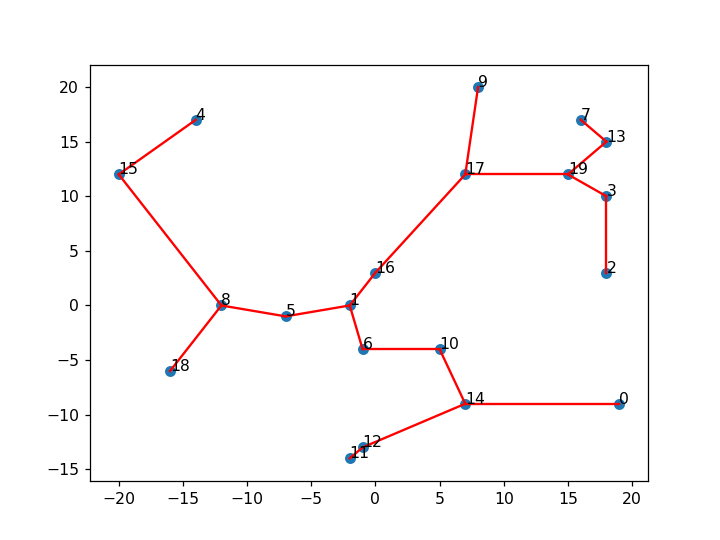

Points are: 
[0(19,-9), 1(-2,0), 2(18,3), 3(18,10), 4(-14,17), 5(-7,-1), 6(-1,-4), 7(16,17), 8(-12,0), 9(8,20), 10(5,-4), 11(-2,-14), 12(-1,-13), 13(18,15), 14(7,-9), 15(-20,12), 16(0,3), 17(7,12), 18(-16,-6), 19(15,12)]
Minimum spanning tree graph is : 
{'vertices': [0(19,-9), 1(-2,0), 2(18,3), 3(18,10), 4(-14,17), 5(-7,-1), 6(-1,-4), 7(16,17), 8(-12,0), 9(8,20), 10(5,-4), 11(-2,-14), 12(-1,-13), 13(18,15), 14(7,-9), 15(-20,12), 16(0,3), 17(7,12), 18(-16,-6), 19(15,12)], 'edges': [(1.4142135623730951, 12(-1,-13), 11(-2,-14)), (2.8284271247461903, 13(18,15), 7(16,17)), (3.605551275463989, 16(0,3), 1(-2,0)), (3.605551275463989, 19(15,12), 3(18,10)), (4.123105625617661, 6(-1,-4), 1(-2,0)), (4.242640687119285, 19(15,12), 13(18,15)), (5.0990195135927845, 5(-7,-1), 1(-2,0)), (5.0990195135927845, 8(-12,0), 5(-7,-1)), (5.385164807134504, 14(7,-9), 10(5,-4)), (6.0, 10(5,-4), 6(-1,-4)), (7.0, 3(18,10), 2(18,3)), (7.211102550927978, 18(-16,-6), 8(-12,0)), (7.810249675906654, 15(-20,12), 4(-14,17

In [26]:
# Visualisation related code
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.canvas.draw()

# Generating points
points = pointGenerator(20)

# Printing points for verification
# Please note that the points objects are in "Id(x,y)" format
print("Points are: ")
print(points)

# Creating a new UnionFind object    
partition = UnionFind()

# Inserting all the points using the supporting function
partition.makeSetForAll(points)

# findMinimumSpanningTree function returns the graph (Vertices plus Edges)
# Please note that the points objects are in "Id(x,y)" format
print("Minimum spanning tree graph is : ")
print(findMinimumSpanningTree(partition))


In [27]:
# Printing set of set. It is only one since we have only one forest; the minimum spanning tree
print(partition.setOfSet)

{1: [1(-2,0), 16(0,3), 6(-1,-4), 5(-7,-1), 8(-12,0), 10(5,-4), 14(7,-9), 18(-16,-6), 11(-2,-14), 12(-1,-13), 7(16,17), 13(18,15), 3(18,10), 19(15,12), 2(18,3), 17(7,12), 9(8,20), 0(19,-9), 4(-14,17), 15(-20,12)]}


## Question 4

In [29]:
# Class for partition revised
# Only the new changes are commented. Please refer to the previous class for other comments
class UnionFind:
    
    def __init__(self):
        self.parent = dict()
        self.rank = dict()
        self.graph = {
            'vertices': [],
            'edges': []
        }
        # Additionally adding two variables to make the Dunn Index finding easier. Please refer Q7
        self.dunnMin = 1
        self.dunnMax = 1
        self.setOfSet = {}

    def makeSet(self, x):
        for y in self.graph['vertices']:
            self.graph['edges'].append((x.distance(y),x,y))
        self.graph['vertices'].append(x)
        self.parent[x] = x
        self.rank[x] = 0
        self.setOfSet[x.id] = [x,]
    
    def makeSetForAll(self, points):
        for point in points:
            self.makeSet(point)
    
    # find() with path compression
    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x]) # path compression
        return self.parent[x]

    def union(self, x, y):
        a = self.find(x)
        b = self.find(y)
        if self.rank[a] > self.rank[b]:
            self.rearrangeSetOfSet(a, b)
            self.parent[b] = a
            
        else:
            self.parent[a] = b
            self.rearrangeSetOfSet(b, a)
            if (self.rank[a] == self.rank[b]):
                self.rank[b] = self.rank[b] + 1
    
    # For maintaining a set of sets
    def rearrangeSetOfSet(self, parent, newChild):
        self.setOfSet[parent.id].extend(self.setOfSet[newChild.id])
        self.setOfSet.pop(newChild.id)

## Question 5

In [30]:
# The num variable represents the number of clusters (grids) we need in the final graph
def makeGrids(partition, num):
        t = []
        # Maximum length edge within any cluster
        # For printing purpose only. Helps for verification
        maxEdge = None
        num = num + 1
        count = len((partition.graph["vertices"]))
        partition.graph["edges"] = sorted(partition.graph['edges'], key=lambda z:z[0])
        
        # Creating a new graph to store the clustered output
        clusteredGraph = {'vertices': partition.graph["vertices"],
             'edges': []}
        
        for i in partition.graph['edges']:
            if partition.find(i[1]) != partition.find(i[2]):
                # Checks is we reach the required number of clusters. If yes, the operation is bypassed.
                if (count >= num):
                    partition.union(i[1], i[2])
                    clusteredGraph['edges'].append(i)
                    visualize(clusteredGraph)
                    # Rewriting the dunnMax and maxEdge everytime so that we get the last value at the end which is the actual value
                    partition.dunnMax = i[0]
                    maxEdge = i
                # Looks for the next edge after the last added edge (This is the minimum distance between clusters) 
                elif count == (num-1):
                    partition.dunnMin = i[0]
                    print("Minimum Distance Edge Between Clustures: ",(i[1].id, i[2].id))
                count = count - 1
        print("Maximum Distance Edge Inside a clusters : ",(maxEdge[1].id,maxEdge[2].id))
        visualize(clusteredGraph)
        return partition.setOfSet

### Testing and Visualization for question 5

<IPython.core.display.Javascript object>


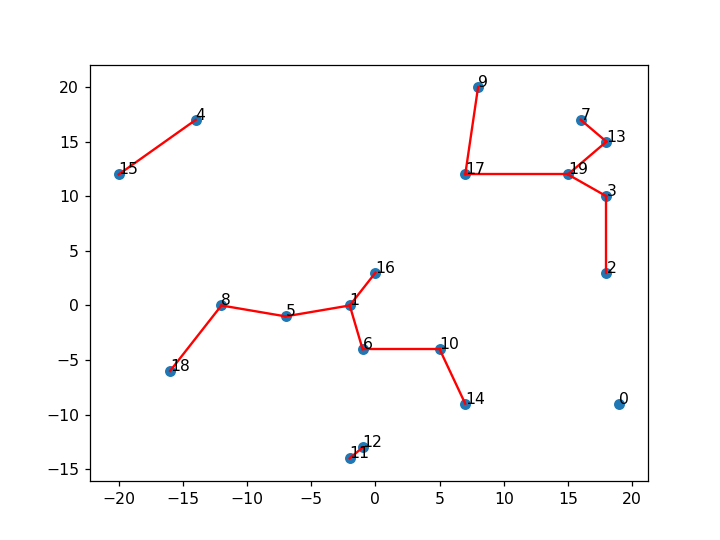

Points: 
[0(19,-9), 1(-2,0), 2(18,3), 3(18,10), 4(-14,17), 5(-7,-1), 6(-1,-4), 7(16,17), 8(-12,0), 9(8,20), 10(5,-4), 11(-2,-14), 12(-1,-13), 13(18,15), 14(7,-9), 15(-20,12), 16(0,3), 17(7,12), 18(-16,-6), 19(15,12)]
Minimum Distance Edge Between Clustures:  (14, 12)
Maximum Distance Edge Inside a clusters :  (17, 9)


{0: [0(19,-9)],
 1: [1(-2,0),
  16(0,3),
  6(-1,-4),
  5(-7,-1),
  8(-12,0),
  10(5,-4),
  14(7,-9),
  18(-16,-6)],
 4: [4(-14,17), 15(-20,12)],
 7: [7(16,17), 13(18,15), 3(18,10), 19(15,12), 2(18,3), 17(7,12), 9(8,20)],
 11: [11(-2,-14), 12(-1,-13)]}

In [31]:
# Visualisation related code
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.canvas.draw()

# The points are same as that of the previous ones
# Printing for verification
print("Points: ")
print(points)
    
# Creating new UnionFind object
partition = UnionFind()

# Adding points
partition.makeSetForAll(points)

# Making 5 grids
# The clusters are returned as set of set (which is implemented as a dictionary)
# The keys of the dictionary are IDs of the parent elements
makeGrids(partition, 5)

## Question 6

In [32]:
# This is a supporting function to get any point object with id
# So that the user can easily denote the point with its ID
def getPointObject(partition, id):
    for point in partition.graph['vertices']:
        if point.id == id:
            return point
    return None
    
# This function checks if the points belongs to same grid or not
# Parameter "one" and "two" are IDs of the points
def isInSameGrid(partition, one, two):
    parentOne = partition.find(getPointObject(partition, one))
    parentTwo = partition.find(getPointObject(partition, two))
    if parentOne.id == parentTwo.id:
        return True
    else:
        return False

### Testing for question 6

In [33]:
# Chcking if two points are in same grid
# parameters are (UnionFind onject, id of the first point, id of the second point)
# The results can be cross checked with the visualization abovve. IDs are marked in it.
print(isInSameGrid(partition, 16, 12))
print(isInSameGrid(partition, 19, 14))

False
False


## Question 7

For getting Dunn Index, finding minimum and maximum distance by comparing the distance between edges is a difficult process and the time complexity is high. 

One of the easiest way to find the Dunn Index is to make two class variables "dunnMax",which represents the maximum edge to edge distance in any of the cluster and "dunnMin", the minimum inter cluster distance, and insert the values to them when thee Kruskal algorithm runs.

As we have already sorted the edges in the increasing length order, dunnMin whould be the next edge which comes just after the completion of the clustering in the Kruskal algorithm (function: makeGrids(partition, num))

Similarly, the dunnMax would be the edge which is inserted just before the completion, ie. the last inserted edge. 

Since we have computed both values, the only thing we have to do is to find the ratio.


In [34]:
# Function to find Dunn Index
def findDunnIndex(partition):
    return partition.dunnMin/partition.dunnMax


### Testing for question 7

In [35]:
print(findDunnIndex(partition))

1.1094003924504583


Also in question five testing, it clearly shows which edge is selected as dunnMin and which as dunnMax. This helps to verify the results

## Question 8

In k cluster, some of the edges are absent which are there in the minimum cost spanning tree. These are the largest (N-1) edges in the minimum cost spanning tree, where N is the number of clusteres we have made. This means we simply prevented joining the forests once we have reached the required number of forests